### STDP

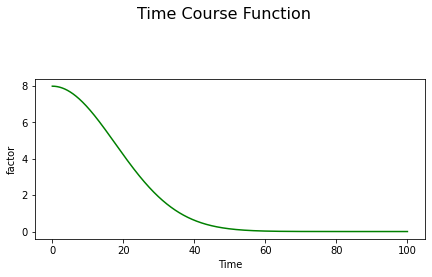

In [135]:
%run models.ipynb
%run SNN.ipynb


#p -> populations
class STDP:
    I1 = None
    I2 = None
    I3 = None
    t_list = []
    p = None

    def __init__(self, first_func: str, second_func: str, third_func: str):
        neuron_list = []
        p_size = 3
        s = 42
        np.random.seed(s)
        for i in range(p_size):
            neuron_list.append(LIF(10 + np.random.rand() * 3
                                   , 8 + np.random.rand() * 4
                                   , -79, -50, 5, -68))
        global p
        p = Population(p_type='exitatory', n_list=neuron_list, time_c=t_course)
        global I1
        I1 = lambda x: eval(first_func)
        global I2
        I2 = lambda x: eval(second_func)
        global I3
        I3 = lambda x: eval(third_func)
        input_current_list = [I1, I2, I3]

        p.running(I_lists=input_current_list,time_interval=50,
                  step=0.03125,dt_minus=6,dt_plus=10,a_minus=-4,
                  a_plus=+6, time_course_threshold=0.3)

        global t_list
        t_list = []
        time = 0
        step = 0.03125
        for i in range(len(p.c_history)):
            t_list.append(time)
            time += step

    def in_plot(self):
        figure = plt.figure(figsize=(15, 4))
        figure.suptitle('', fontsize=15)


        # neuron1
        pt = figure.add_subplot(131)
        I = []
        for i in t_list:
            I.append(I1(i))
        pt.plot(t_list, I, color='green')
        pt.set_ylabel("Input")
        pt.set_xlabel("Time")
        pt.set_title('Neuron One')


        # neuron2
        pt = figure.add_subplot(132)
        I = []
        for i in t_list:
            I.append(I2(i))
        pt.plot(t_list, I)
        pt.set_ylabel("Input")
        pt.set_xlabel("Time")
        pt.set_title('Neuron Two')


        # neuron3
        pt = figure.add_subplot(133)
        I = []
        for i in t_list:
            I.append(I3(i))
        pt.plot(t_list, I)
        pt.set_ylabel("Input")
        pt.set_xlabel("Time")
        pt.set_title('Neuron Three')
        plt.show()

    def w_plotting(self):
        figure = plt.figure(figsize=(15, 10))
        figure.suptitle('Synaptic Weight Changes', fontsize=16)
        axes = plt.axes()
        axes.set_facecolor('cyan')
        



        plotting_figurations = figure.add_subplot(231)
        plotting_figurations.plot(t_list, p.c_history[:, 1], color='green')
        plotting_figurations.set_ylabel("Connetion Weight(W(ij))")
        plotting_figurations.set_xlabel("Time")
        plotting_figurations.set_title('weight12')
        #plotting_figurations.set_title('style: {!r}'.format('seaborn'), color='C0')



        plotting_figurations = figure.add_subplot(232)
        plotting_figurations.plot(t_list, p.c_history[:, 2], color='green')
        plotting_figurations.set_ylabel("Connetion Weight(W(ij))")
        plotting_figurations.set_xlabel("Time")
        plotting_figurations.set_title('weight13')


        plotting_figurations = figure.add_subplot(233)
        plotting_figurations.plot(t_list, p.c_history[:, 3], color='green')
        plotting_figurations.set_ylabel("Connetion Weight(W(ij))")
        plotting_figurations.set_xlabel("Time")
        plotting_figurations.set_title('weight21')


        plotting_figurations = figure.add_subplot(234)
        plotting_figurations.plot(t_list, p.c_history[:, 5], color='green')
        plotting_figurations.set_ylabel("Connetion Weight(W(ij))")
        plotting_figurations.set_xlabel("Time")
        plotting_figurations.set_title('weight23')


        plotting_figurations = figure.add_subplot(235)
        plotting_figurations.plot(t_list, p.c_history[:, 6], color='green')
        plotting_figurations.set_ylabel("Connetion Weight(W(ij))")
        plotting_figurations.set_xlabel("Time")
        plotting_figurations.set_title('weight31')


        plotting_figurations = figure.add_subplot(236)
        plotting_figurations.plot(t_list, p.c_history[:, 7], color='green')
        plotting_figurations.set_ylabel("Connetion Weight(W(ij))")
        plotting_figurations.set_xlabel("Time")
        plotting_figurations.set_title('weight32')
        plt.show()


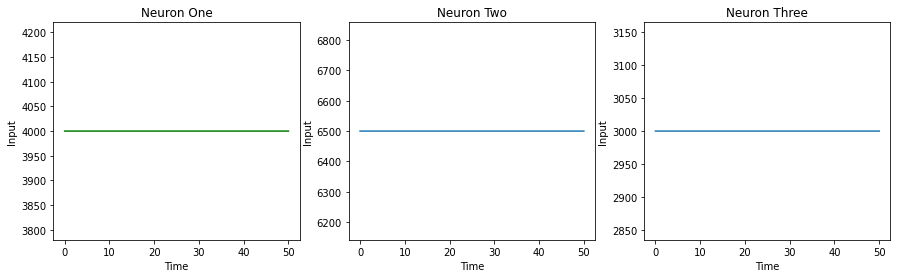

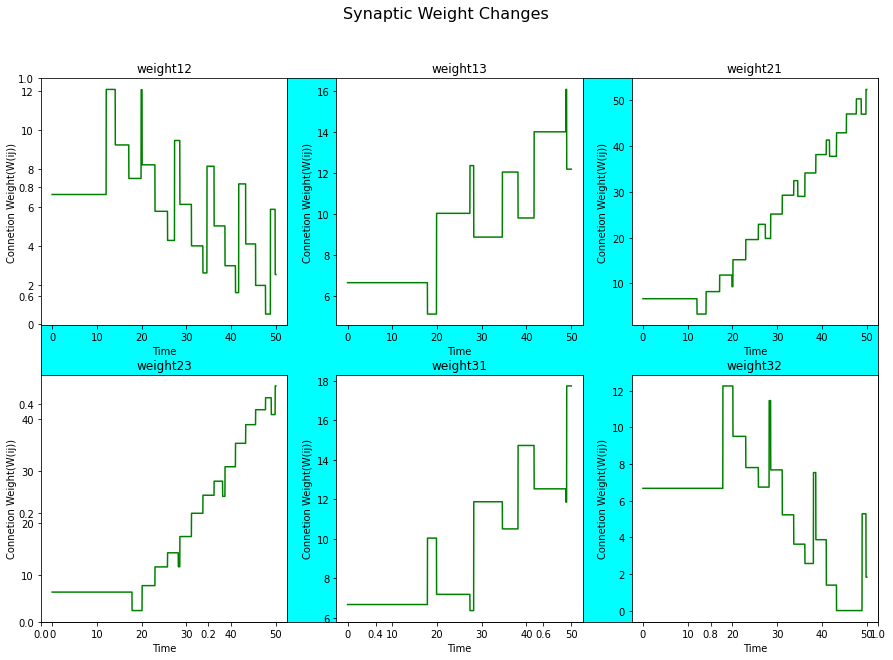

In [136]:
stdp_model = STDP("4000", "6500", "3000")
stdp_model.in_plot()
stdp_model.w_plotting()

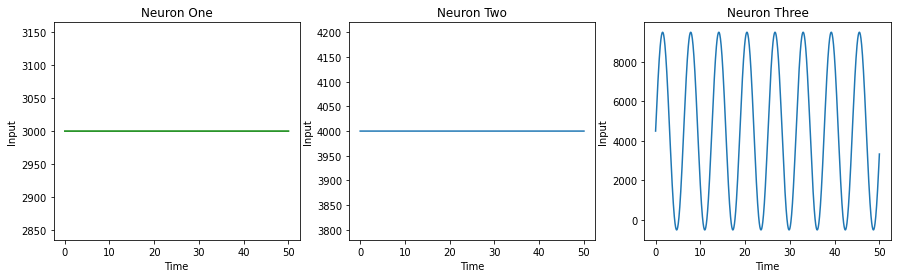

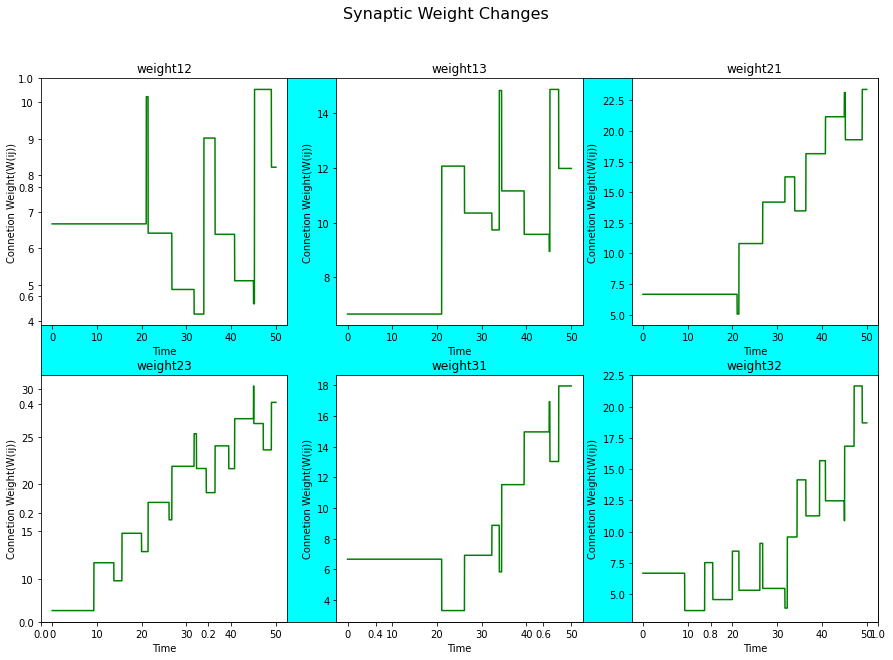

In [137]:
stdp_model = STDP("3000", "4000", "5000 * (math.sin(x) + 0.9)")
stdp_model.in_plot()
stdp_model.w_plotting()


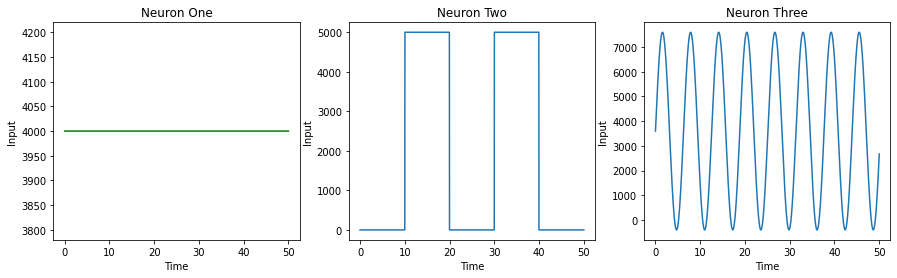

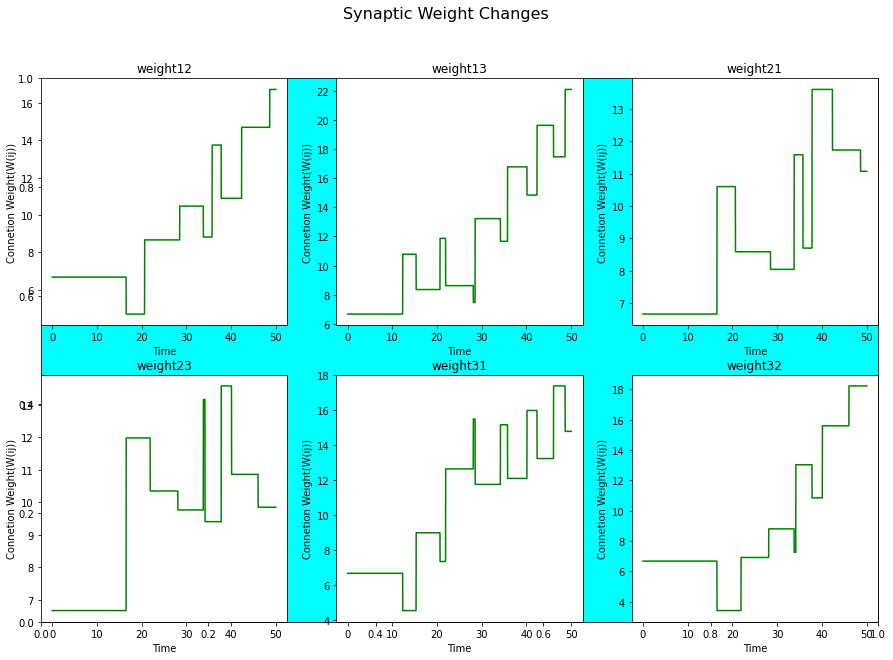

In [138]:
stdp_model = STDP("4000", "5000 if 10 < x < 20 or 30 < x < 40 else 0",
                  "4000 * (math.sin(x) + 0.9)")
stdp_model.in_plot()
stdp_model.w_plotting()

In [139]:
def snn_time_course(time, sigma=7, m=0):
    return 250 * (1 / (sigma * math.sqrt(2 * math.pi)))\
           * math.exp(-((time - m) / sigma) ** 2)

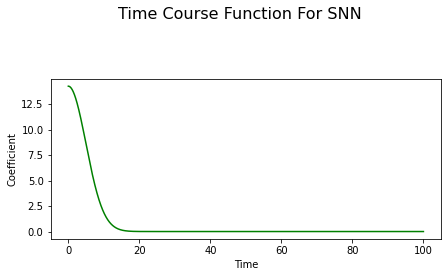

In [140]:
# plotting
times = np.arange(0, 100, 0.01)
y = np.zeros_like(times)
for i, t in enumerate(times):
    y[i] = snn_time_course(t)

figure = plt.figure(figsize=(7, 10))
figure.suptitle('Time Course Function For SNN', fontsize=16)
res = figure.add_subplot(311)
res.plot(times, y, color='green')
res.set_ylabel("Coefficient")
res.set_xlabel("Time")
plt.show()



In [141]:
dataset = pd.read_excel ('./dataSet.xlsx')


In [142]:
dataset

,test,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,inpput_neuron_number,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10
1,1.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0
2,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
3,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0
5,5.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0
6,output_neuron_number,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,inpput_neuron_number,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10


accuracy for TEST is:  40.0 %
accuracy for TRAIN data:  40.0 %


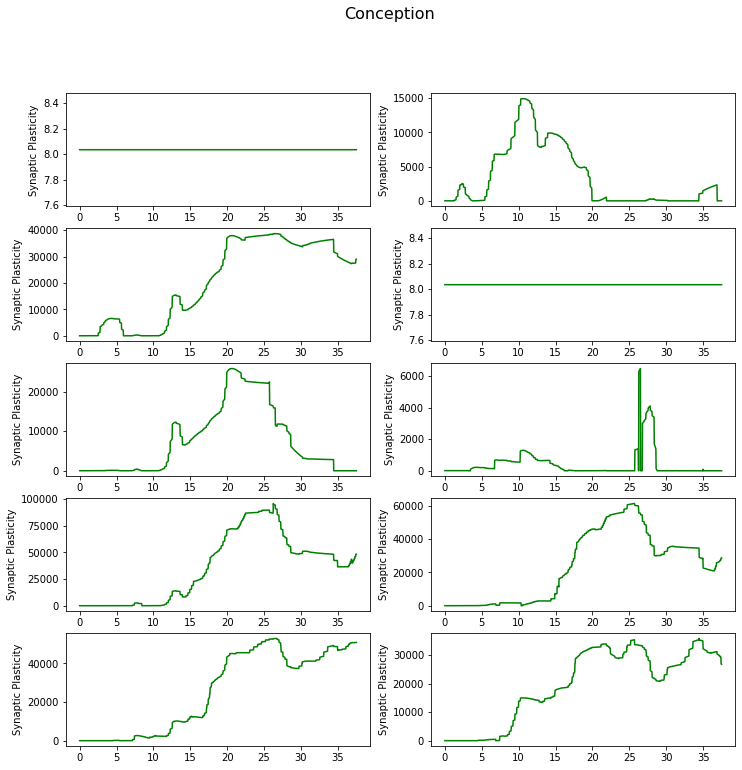

In [143]:
AXIS_TRAIN = dataset.iloc[1:6, 1:].values.T * 10000
YIS_TRAIN = dataset.iloc[6, 1:].values
AXIS_TEST = dataset.iloc[10:15, 1:].values.T * 10000
YIS_TEST = dataset.iloc[15, 1:].values

np.random.seed(42)
lif_neuron_parameters = \
    {
        'R': 10,
        'tau': 8,
        'u_rest': -79,
        'threshold': -50,
        'u_spike': 5,
        'u_reset': -68,
        'random': True,
        'rand_change': 2
    }

network = SNN(n_dim=(5, 2), lif_n_parametr=lif_neuron_parameters,
              time_course=snn_time_course,tau_tag=15,tau_dopamine=15,reward=5)
network.compatible(AXIS_TRAIN,YIS_TRAIN, step=0.125,epoch_time=5,
                   step_minus=6,dt_plus=10,a_minus=-4,a_plus=+6,time_course_thre=1,
                   iter=30, learn_time=0.5)

pred_TRAIN = network.forestall(AXIS_TRAIN, 5, 0.125, 1)
pred_Test = network.forestall(AXIS_TEST, 5, 0.125, 1)

from sklearn import metrics
print('accuracy for TEST is: ', 100 *
      metrics.accuracy_score(YIS_TEST.astype(np.int32),
                             pred_Test.astype(np.int32)), '%')
print('accuracy for TRAIN data: ', 100 *
      metrics.accuracy_score(YIS_TRAIN.astype(np.int32),
                             pred_TRAIN.astype(np.int32)), '%')

connections = network.c_history[0]
t_list = []
time = 0
dt = 0.03125
for i in range(len(connections)):
    t_list.append(time)
    time += dt

figure = plt.figure(figsize=(12, 12))
figure.suptitle('Conception', fontsize=16)

for i in range(5):
    for j in range(2):
        a = plt.subplot2grid((5, 2), (i, j))
        a.plot(t_list, connections[:, 2 * i + j], color='green')
        a.set_ylabel("Synaptic Plasticity")
plt.show()